<a href="https://colab.research.google.com/github/isaacebi/AirAsia-Academy/blob/main/assessment/mall_customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [2]:
df = pd.read_csv('mall_customer.csv')
df

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Data Inspection

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [15]:
df.isna().sum() # no missing values

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [16]:
df.duplicated().sum() # no duplicated

0

In [4]:
df.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Insight**
- No negative values
- CustomerID columns might be less relevant data

# Data Visualization

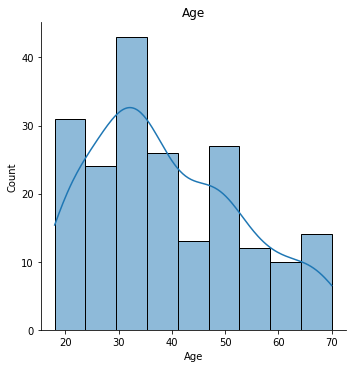

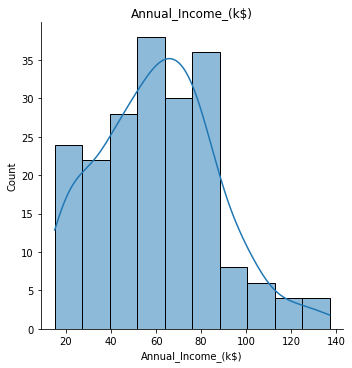

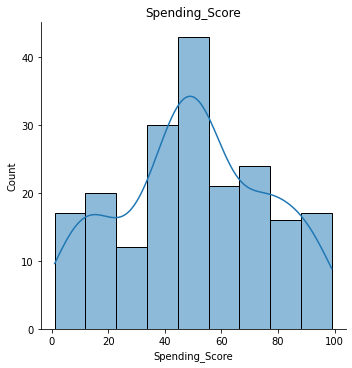

In [7]:
for col in ["Age", "Annual_Income_(k$)", "Spending_Score"]:
  sns.displot(x=df[col], kde=True)
  plt.title(col)
  plt.show()

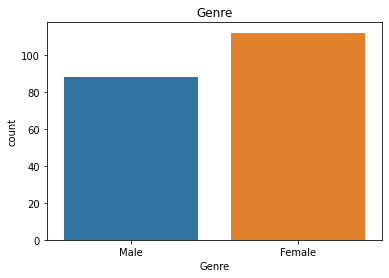

In [19]:
sns.countplot(x=df['Genre'])
plt.title("Genre")
plt.show()

**Insight**
- Not too off balanced

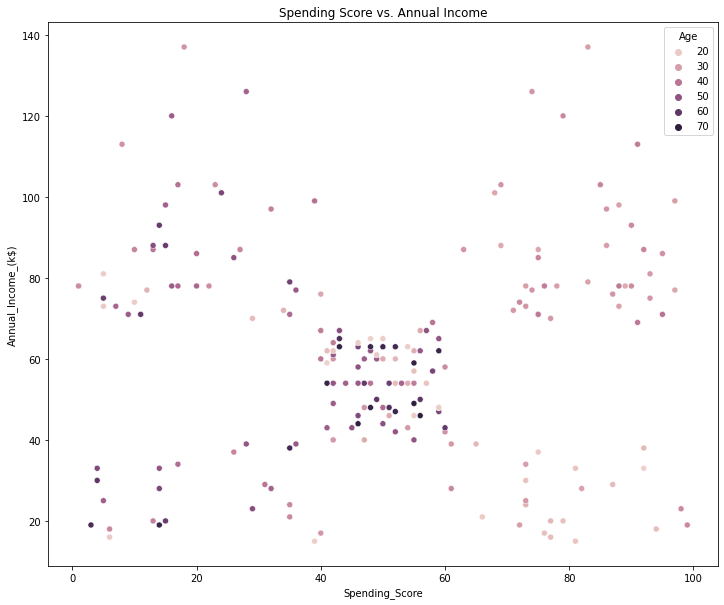

In [12]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=df, x='Spending_Score', y='Annual_Income_(k$)', hue='Age');
plt.title("Spending Score vs. Annual Income")
plt.show()

**Insight**
- Despite the Annual Income, younger age seems to have higher Spending Score

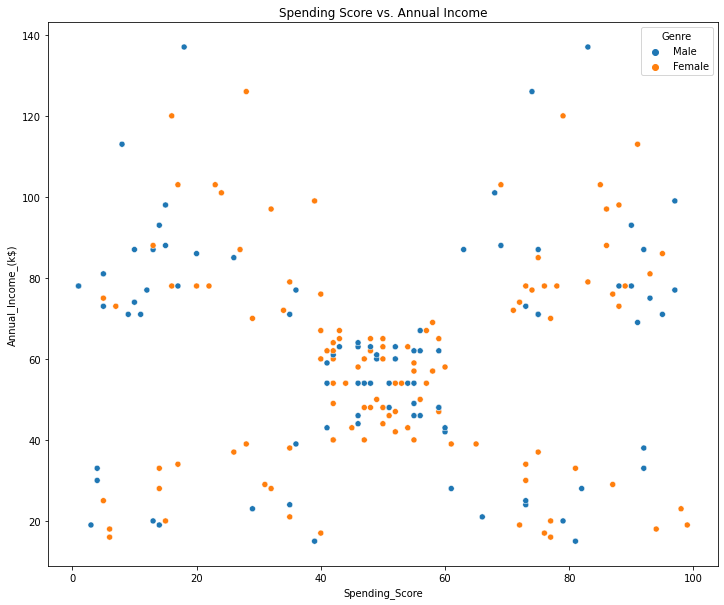

In [18]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=df, x='Spending_Score', y='Annual_Income_(k$)', hue='Genre');
plt.title("Spending Score vs. Annual Income")
plt.show()

# Model Development - Unsupervised

In [13]:
from sklearn.cluster import KMeans

In [17]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual_Income_(k$)', 'Spending_Score'], dtype='object')

In [20]:
# Features: ['Annual_Income_(k$)', 'Spending_Score']
X = df[['Annual_Income_(k$)', 'Spending_Score']]
X

,Annual_Income_(k$),Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


Text(0.5, 1.0, 'KMeans Clustering')

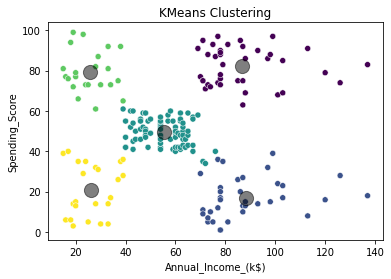

In [22]:
# unsupervised model
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# plotting
sns.scatterplot(x=X['Annual_Income_(k$)'], y=X['Spending_Score'], c=y_kmeans, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.title("KMeans Clustering")